In [1]:
import os, sys
os.chdir(r"D:\User\Desktop\dl_project")
sys.path.insert(0, os.getcwd())
print(os.getcwd())


D:\User\Desktop\dl_project


In [2]:
from src.data import load_mnist_images_numpy
from src.section3_cnn_numpy import train_cnn, plot_history, visualize_conv1_filters, visualize_feature_maps, default_cnn_receptive_field, compare_pooling

X_train, y_train, X_test, y_test = load_mnist_images_numpy()

[pool=max] Epoch 1/8 train_loss=1.5223 train_acc=0.5143 test_acc=0.8446
[pool=max] Epoch 2/8 train_loss=0.4202 train_acc=0.8754 test_acc=0.8996
[pool=max] Epoch 3/8 train_loss=0.3146 train_acc=0.9083 test_acc=0.9172
[pool=max] Epoch 4/8 train_loss=0.2637 train_acc=0.9222 test_acc=0.9327
[pool=max] Epoch 5/8 train_loss=0.2310 train_acc=0.9328 test_acc=0.9400
[pool=max] Epoch 6/8 train_loss=0.2056 train_acc=0.9400 test_acc=0.9452
[pool=max] Epoch 7/8 train_loss=0.1874 train_acc=0.9451 test_acc=0.9508
[pool=max] Epoch 8/8 train_loss=0.1725 train_acc=0.9498 test_acc=0.9525


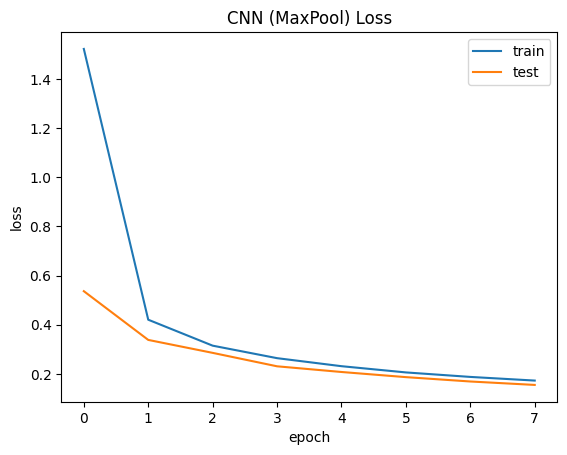

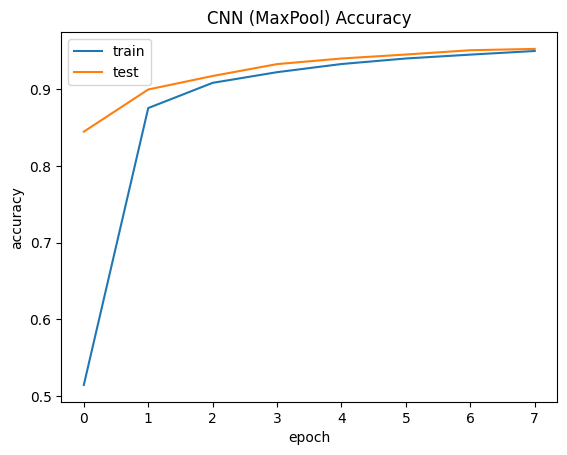

In [4]:
params, hist = train_cnn(X_train, y_train, X_test, y_test,
                         epochs=8, batch_size=128, lr=0.01, pool_mode="max")

plot_history(hist, "CNN (MaxPool)")

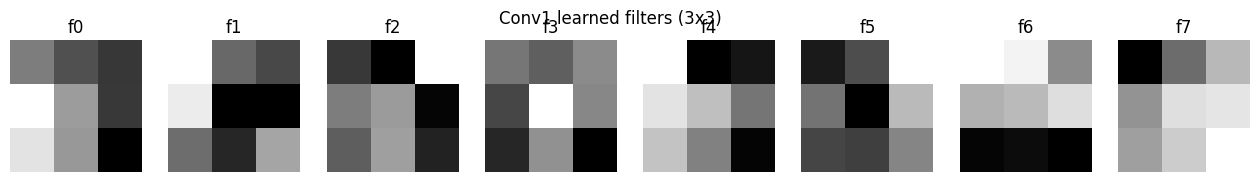

In [5]:
visualize_conv1_filters(params)

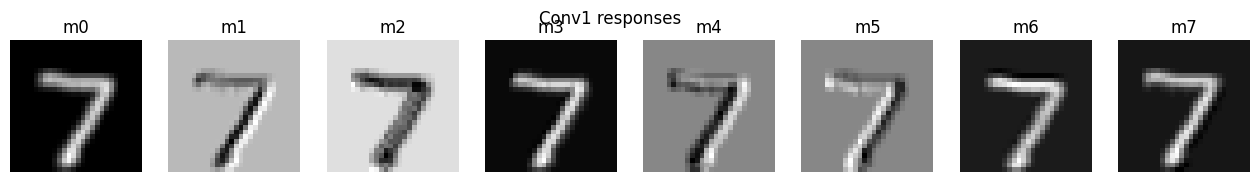

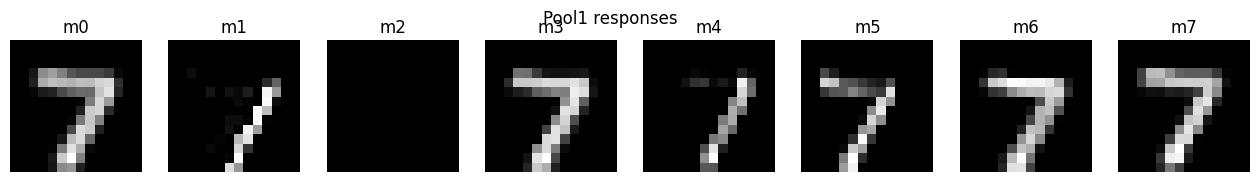

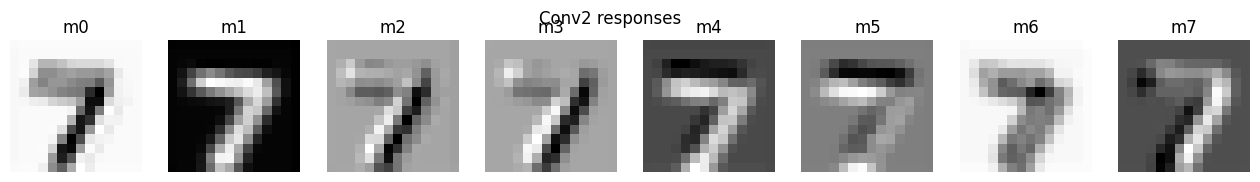

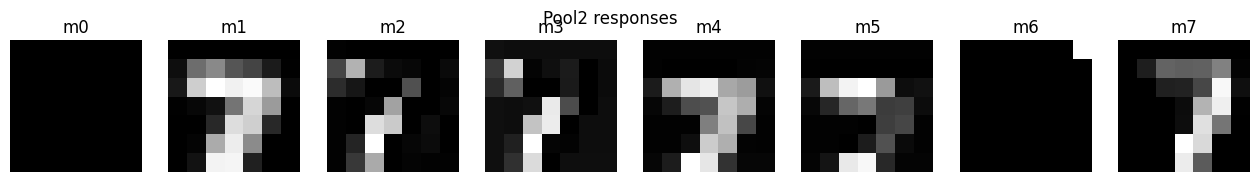

In [6]:
X_one = X_test[:1]
visualize_feature_maps(X_one, params, layer="conv1")
visualize_feature_maps(X_one, params, layer="pool1")
visualize_feature_maps(X_one, params, layer="conv2")
visualize_feature_maps(X_one, params, layer="pool2")

In [7]:
default_cnn_receptive_field()

Theoretical receptive field after pool2: 10x10, effective stride=4


(10, 4)

[pool=max] Epoch 1/5 train_loss=1.5223 train_acc=0.5143 test_acc=0.8446
[pool=max] Epoch 2/5 train_loss=0.4202 train_acc=0.8754 test_acc=0.8996
[pool=max] Epoch 3/5 train_loss=0.3146 train_acc=0.9083 test_acc=0.9172
[pool=max] Epoch 4/5 train_loss=0.2637 train_acc=0.9222 test_acc=0.9327
[pool=max] Epoch 5/5 train_loss=0.2310 train_acc=0.9328 test_acc=0.9400
[pool=avg] Epoch 1/5 train_loss=2.0462 train_acc=0.3433 test_acc=0.7258
[pool=avg] Epoch 2/5 train_loss=0.5859 train_acc=0.8361 test_acc=0.8798
[pool=avg] Epoch 3/5 train_loss=0.3975 train_acc=0.8850 test_acc=0.8957
[pool=avg] Epoch 4/5 train_loss=0.3583 train_acc=0.8965 test_acc=0.9088
[pool=avg] Epoch 5/5 train_loss=0.3342 train_acc=0.9045 test_acc=0.9117


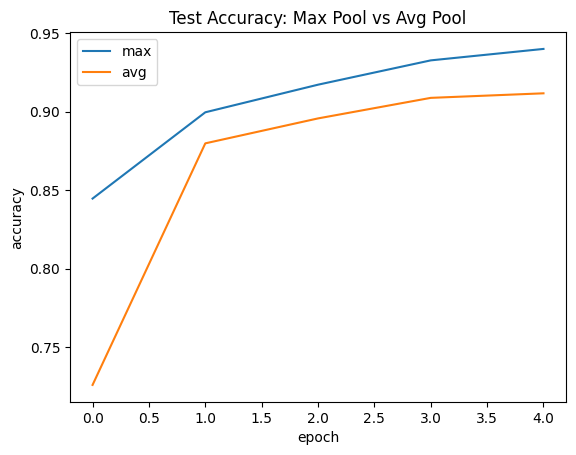

In [8]:
results = compare_pooling(X_train, y_train, X_test, y_test, epochs=5, lr=0.01)

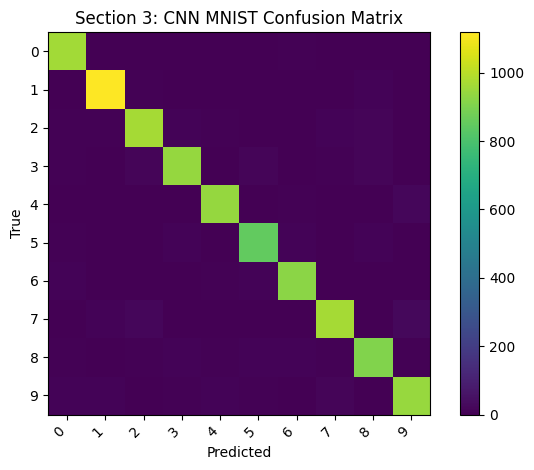

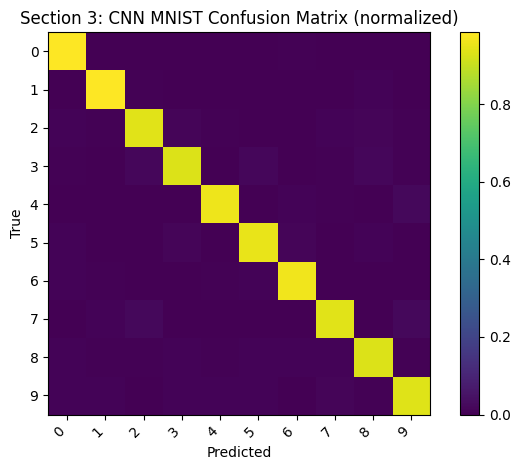

In [9]:
from src.utils import confusion_matrix_np, plot_confusion_matrix
from src.section3_cnn_numpy import cnn_forward

scores, _ = cnn_forward(X_test, params, pool_mode="max")
y_pred = scores.argmax(axis=1)

cm = confusion_matrix_np(y_test, y_pred, num_classes=10)
plot_confusion_matrix(cm, [str(i) for i in range(10)], title="Section 3: CNN MNIST Confusion Matrix")
plot_confusion_matrix(cm, [str(i) for i in range(10)], title="Section 3: CNN MNIST Confusion Matrix (normalized)", normalize=True)
